In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization,Flatten,Dense 
from keras.preprocessing import sequence

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
print(x_test.shape)

(10000, 28, 28)


In [ ]:
print(y_test.shape)

(10000,)


In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.20, random_state = 0)

In [ ]:
y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)
y_test = pd.get_dummies(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(96,(5,5),activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(80,(5,5),activation='relu'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 96)        2496      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 80)        192080    
                                                                 
 flatten (Flatten)           (None, 32000)             0         
                                                                 
 batch_normalization (BatchN  (None, 32000)            128000    
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32000)             0         
                                                                 
 dense (Dense)               (None, 128)               4096128   
                                                        

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 
history = model.fit(x_train, y_train, epochs=10, batch_size= 64, validation_data = (x_val, y_val) ,validation_batch_size= 64)

Epoch 1/10
750/750 [==============================] - 31s 26ms/step - loss: 0.1291 - accuracy: 0.9619 - val_loss: 0.0458 - val_accuracy: 0.9858
Epoch 2/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0494 - accuracy: 0.9852 - val_loss: 0.0436 - val_accuracy: 0.9875
Epoch 3/10
750/750 [==============================] - 19s 25ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0316 - val_accuracy: 0.9901
Epoch 4/10
750/750 [==============================] - 20s 27ms/step - loss: 0.0271 - accuracy: 0.9916 - val_loss: 0.0329 - val_accuracy: 0.9898
Epoch 5/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.0320 - val_accuracy: 0.9907
Epoch 6/10
750/750 [==============================] - 19s 25ms/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.0541 - val_accuracy: 0.9855
Epoch 7/10
750/750 [==============================] - 19s 25ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0420 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0305 - accuracy: 0.9913 - 2s/epoch - 7ms/step

Test accuracy: 0.9912999868392944


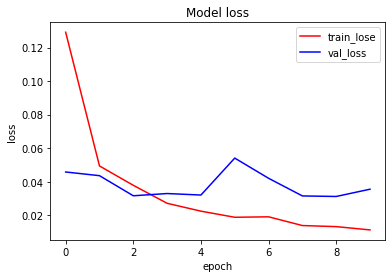

In [ ]:
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color ='b')
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_lose', 'val_loss'], loc='upper right')
plt.show()

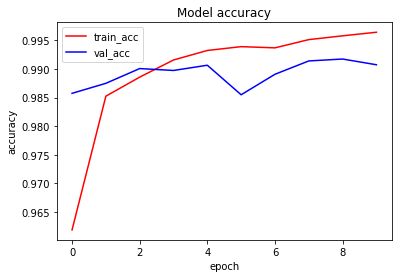

In [ ]:
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc','val_acc'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_test = np.array(y_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 975    1    0    0    0    1    0    0    3    0]
 [   2 1122    2    2    1    2    2    0    2    0]
 [   0    0 1030    0    0    0    0    1    1    0]
 [   0    0    3 1001    0    2    0    1    3    0]
 [   0    0    0    0  979    0    2    0    0    1]
 [   1    0    0    4    0  884    3    0    0    0]
 [   1    1    0    0    2    1  951    0    2    0]
 [   0    2    9    0    1    0    0 1013    1    2]
 [   0    0    2    0    0    0    0    0  972    0]
 [   1    0    0    1   12    3    0    3    3  986]]


0.9913